In [2]:
import numpy as np
from scipy.optimize import check_grad
import math

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Parameters for the normal distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
size = (4, 2)  # Size of the sample (rows, columns)

In [3]:
def function(point):
    alpha = 5
    sum = np.zeros(len(point))
    for i in range(len(point)):
        point_number = i//2+1 # Converge i to the point number

        for m in range(len(Y)):
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[Y[m][1]-1] - point[Y[m][2]-1]))**2 # Calculate the euclidean distance squared
            sum[i] += np.log(1/(1+np.exp(-connection*(alpha-distance))))
    return sum


def grad(point):
    alpha = 5
    gradient = np.zeros((len(point),2))
    #gradient = np.zeros(8)
    for i in range(len(point)*2):
        point_number = i//2+1 # Converge i to the point number
        if i%2==0: # Check if we are finding the gradient in x og y direction
            index = 0
        else: 
            index = 1

        for m in range(len(Y)):
            if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
                connection = Y[m][0] # Check to see if there is a connection
                distance = (np.linalg.norm(point[Y[m][1]-1] - point[Y[m][2]-1]))**2 # Calculate the euclidean distance squared
                point_index_diff = (point[point_number-1][index] - point[Y[m][1]-1][index]) + (point[point_number-1][index] - point[Y[m][2]-1][index]) # Calculate Points_a,i-Points_b,i
                numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
                denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
                gradient[point_number-1][index] += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient

In [4]:
# For point.flatten()
def function(point):
    alpha = 5
    sum = np.zeros(len(point))
    for i in range(len(point)):
        point_number = i//2+1 # Converge i to the point number

        for m in range(len(Y)):
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[(Y[m][1]-1)*2:(Y[m][1]-1)*2+2] - point[(Y[m][2]-1)*2:(Y[m][2]-1)*2+2]))**2 # Calculate the euclidean distance squared
            sum[i] += np.log(1/(1+np.exp(-connection*(alpha-distance))))
    return sum

def grad(point):
    alpha = 5
    gradient = np.zeros(8)
    for i in range(len(point)*2):
        point_number = i//2+1 # Converge i to the point number
        if i%2==0: # Check if we are finding the gradient in x og y direction
            index = 0
        else: 
            index = 1

        for m in range(len(Y)):
            if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
                connection = Y[m][0] # Check to see if there is a connection
                distance = (np.linalg.norm(point[(Y[m][1]-1)*2:(Y[m][1]-1)*2+2] - point[(Y[m][2]-1)*2:(Y[m][2]-1)*2+2]))**2 # Calculate the euclidean distance squared
                point_index_diff = (point[(point_number-1)*2+index] - point[(Y[m][1]-1)*2+index]) + (point[(point_number-1)*2+index] - point[(Y[m][2]-1)*2+index]) # Calculate Points_a,i-Points_b,i
                numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
                denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
                gradient[i] += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient

In [7]:
# Check gradient
epsilon = 1e-6
point = np.random.normal(mean, std_dev, size).flatten()# Generate points from a normal distribution
error = check_grad(function, grad, point)
print("Gradient error:", error)

Gradient error: 1.479118104291377e-06


In [8]:
hist = np.zeros(1000)
for n in range(1000):
    point = np.random.normal(mean, std_dev, size).flatten()# Generate points from a normal distribution
    hist[n] = check_grad(function, grad, point)

(array([ 57., 155., 239., 162.,  88.,  60.,  59.,  40.,  35.,  29.,  20.,
         10.,  11.,  10.,   7.,   5.,   1.,   3.,   0.,   0.,   0.,   1.,
          3.,   0.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([1.29349099e-07, 2.76471496e-07, 4.23593893e-07, 5.70716290e-07,
        7.17838688e-07, 8.64961085e-07, 1.01208348e-06, 1.15920588e-06,
        1.30632828e-06, 1.45345067e-06, 1.60057307e-06, 1.74769547e-06,
        1.89481786e-06, 2.04194026e-06, 2.18906266e-06, 2.33618506e-06,
        2.48330745e-06, 2.63042985e-06, 2.77755225e-06, 2.92467464e-06,
        3.07179704e-06, 3.21891944e-06, 3.36604184e-06, 3.51316423e-06,
        3.66028663e-06, 3.80740903e-06, 3.95453142e-06, 4.10165382e-06,
        4.24877622e-06, 4.39589862e-06, 4.54302101e-06]),
 <BarContainer object of 30 artists>)

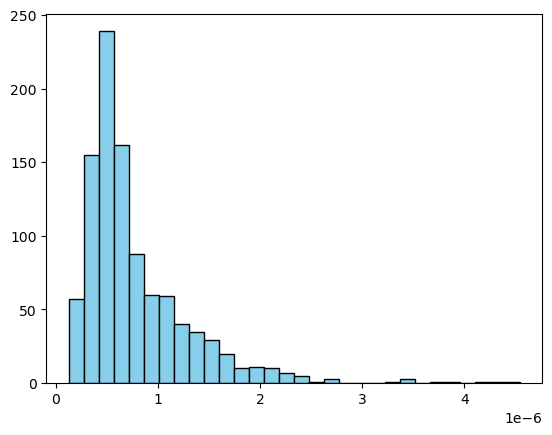

In [9]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')